# 19일차

## 머신러닝

### 연습문제
- 아이리스의 첫번째 샘플과 가장 거리가 가까운 점 3개를 뽑으시오.(argsort함수사용)
- 전체 산점도(sepal length vs sepal width)를 그리고 첫번째 샘플과 가까운점 3개를 다른 색깔로 표시해 보시오.(plt.scatter의 c 옵션 사용)
- 아이리스의 setosa의 평균점을 구하고 이와 가장 가까운 3점을 뽑은 후, 위와 같이 산점도를 그려보시오.

### 텐서플로 설치

In [4]:
pip install tensorflow==2.4

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=bb84122450cf9c7cb1020d9148a21ce9fffd660dbc21a2883e620bf51bd224d7
  Stored in directory: c:\users\hanhe\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=281c300ca628936e75bcff1101f71c61653ed288b715a2ecc0a6659f230cad76
  Stored in directory: c:\users\hanhe\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X=iris.iloc[:,:-1].values
X.shape

(150, 4)

In [5]:
x0=X[0]
x0

array([5.1, 3.5, 1.4, 0.2])

In [7]:
dist=np.sqrt(((X-X[0])**2).sum(axis=1))
dist.shape

(150,)

In [9]:
np.argsort(dist)

array([  0,  17,   4,  39,  27,  28,  40,   7,  49,  21,  48,  26,  19,
        46,  35,  11,  10,  31,  36,  20,  43,  34,  37,   9,  23,   2,
         6,  29,   1,  30,  25,  16,  47,  24,  12,  45,  44,   5,  32,
        22,   3,  18,  42,  33,  38,  14,   8,  13,  15,  41,  98,  57,
        93,  79,  64,  81,  60,  80,  69,  59,  82,  88,  67,  92,  89,
        99,  95,  71,  53,  96,  62,  94,  61,  90,  97,  84,  74,  55,
        66,  85,  78, 106,  91,  75,  51,  87,  65,  73,  63,  58,  68,
        56,  54,  70, 138,  86, 126,  50, 127, 121,  76,  72, 123,  83,
       149, 119, 133,  52, 113, 101, 142,  77, 146, 110, 114, 147, 111,
       134, 137, 115, 141, 116, 148, 145, 103, 139, 128, 112, 132, 136,
       124, 140, 108, 104, 129, 120, 144, 143, 100, 102, 125, 130, 107,
       109, 135, 131, 105, 122, 117, 118], dtype=int64)

In [16]:
idx=np.argsort(dist)[1:4]

In [17]:
near=X[idx]
near

array([[5.1, 3.5, 1.4, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2]])

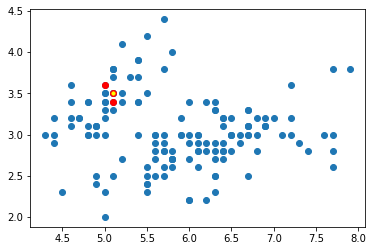

In [18]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(near[:,0],near[:,1],c='red')
plt.scatter(X[0,0],X[0,1],c='yellow',s=10)

In [20]:
m1=X[:50].mean(axis=0)
m2=X[50:100].mean(axis=0)
m3=X[100:].mean(axis=0)

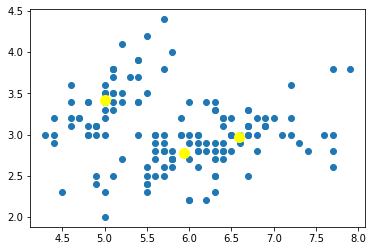

In [23]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(m1[0],m1[1],c='yellow',s=100)
plt.scatter(m2[0],m2[1],c='yellow',s=100)
plt.scatter(m3[0],m3[1],c='yellow',s=100)

## kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model=KNeighborsClassifier(5)

In [26]:
X=iris.iloc[:,:-1].values

In [27]:
y=np.array([0]*50+[1]*50+[2]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
model.fit(X,y)

KNeighborsClassifier()

In [30]:
model.predict([[1,1,1,1],[5,5,5,5]])

array([0, 2])

In [32]:
model.predict_proba([[1,1,1,1],[2,3,3,4]])

array([[1. , 0. , 0. ],
       [0. , 0.8, 0.2]])

In [35]:
pred_y=model.predict(X)

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
np.where(pred_y!=y)

(array([ 70,  72,  83, 106, 119], dtype=int64),)

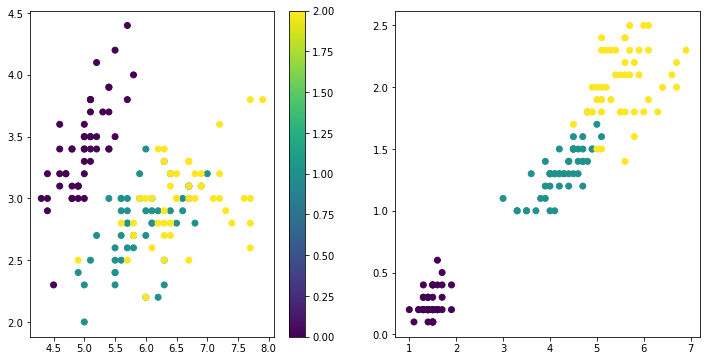

In [39]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3],c=y)

In [43]:
idx=np.where(pred_y!=y)

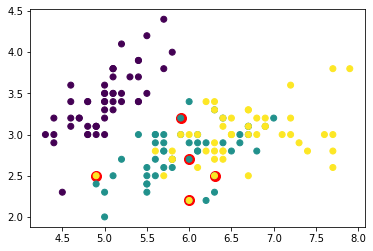

In [44]:
ps=X[idx]
plt.scatter(ps[:,0],ps[:,1],c='red',s=100)
plt.scatter(X[:,0],X[:,1],c=y)

In [45]:
model.score(X,y)

0.9666666666666667

### 복습 문제
- 아이리스에서 setosa를 제외하고, 나머지 꽃들로 kNN을 적용한다 (샘플은 100개)
- X, y 를 잡으시오.
- 속성도 2가지로 제한한다 => sepal_length, sepal_width
- 이 때, X, y 를 잡으시오.
- kNN 을 적용해 보자

In [51]:
iris = pd.read_csv('iris.csv').iloc[:,:-1].values
iris.shape

(150, 4)

In [52]:
X=iris[50:]
y=np.array([0]*50+[1]*50) #versicolor:0,virginica:1
X.shape,y.shape

((100, 4), (100,))

In [53]:
X=X[:, :2]
X.shape

(100, 2)

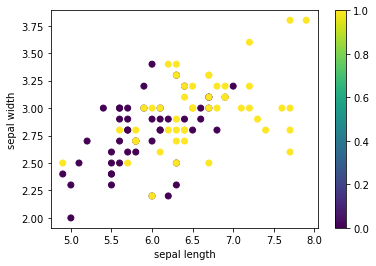

In [54]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.colorbar()

In [55]:
model=KNeighborsClassifier(5)
model.fit(X,y)

KNeighborsClassifier()

In [56]:
pred_y=model.predict(X)
pred_y

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
(pred_y!=y).sum()

23

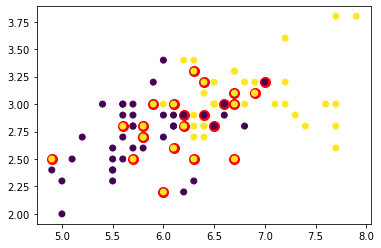

In [59]:
idx=np.where(pred_y!=y)[0]
ps=X[idx]
plt.scatter(ps[:,0],ps[:,1],c='red',s=100)
plt.scatter(X[:,0],X[:,1],c=y)

In [60]:
import mglearn

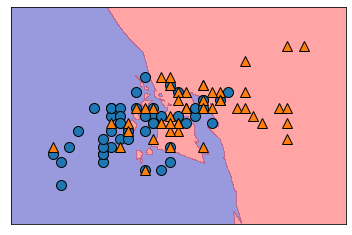

In [63]:
mglearn.plots.plot_2d_separator(model,X,fill=True,eps=0.5,alpha=.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

0.89


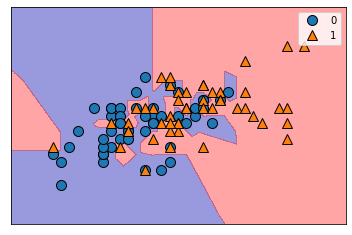

In [64]:
model=KNeighborsClassifier(1)
model.fit(X,y)
mglearn.plots.plot_2d_separator(model,X,fill=True,eps=0.5,alpha=.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend()

print(model.score(X,y))

0.77


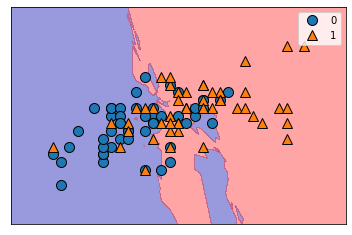

In [65]:
model=KNeighborsClassifier(9)
model.fit(X,y)
mglearn.plots.plot_2d_separator(model,X,fill=True,eps=0.5,alpha=.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend()

print(model.score(X,y))

0.75


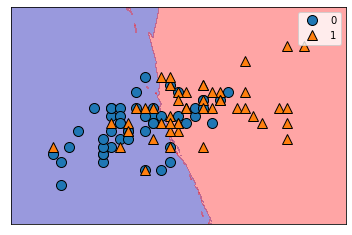

In [66]:
model=KNeighborsClassifier(50)
model.fit(X,y)
mglearn.plots.plot_2d_separator(model,X,fill=True,eps=0.5,alpha=.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend()

print(model.score(X,y))

In [67]:
X.shape

(100, 2)